# 등급별로 순위별로 한 이유
- 등급별 예시를 보면 등급에 따라 점수를 다르게 하는거지, 표준점수하고는 상관 없지 않을거 같고, 그러면 환경순위 기반 정렬하고 다를 게 없다고 생각함.
- 수능에서의 표준점수 -> 시험의 난이도(시험의 평균이 높고 낮냐로 측정함). 우리가 각 발자국에 대해서 Z점수를 알 수는 있겠지. (X-m)이 커질 수록, 표준편차가 작아질수록, z 점수는 커짐.
- 이 z 점수로 중요 발자국을 알지 못할거 같음. 단위 자체가 다른거여서 비교도 못한다고 생각함.


# 데이터의 문제점
- LCA 데이터 보면, 같은 제품인데 다른 용량별로의 발자국이 나옴
- (ex 삼다수 1L, 삼다수 2L, 삼다수 500ml)
- 엑셀로 분석 했을 때, 같은 제품인데(같은 삼다수인데) 용량이 클수록 탄소발자국, 자원발자국이 큰 모습을 보임. -> 이러면 같은 제품에서 용량이 작은 제품이 유리함.
- 그러나, 단위를 통일하여 (1L당 배출량) 으로 계산 후 그래프를 본 결과, 용량이 작을수록 발자국이 큰 모습을 보였음. -> 이러면 위와 반대로 같은 제품에서 용량이 큰 제품이 유리함.
# 그래서 어떻게 발자국을 구했냐
- 같은 제품인데 용량이 다른 것들을 같은 발자국으로 갖게끔 설정했음. kind_of_water_dataset.csv에 저장함.
- 설정한 방법은 각 평균값으로 구했음
- ex 삼다수 탄소 발자국 = (삼다수 1L 탄소 발자국 + 삼다수 2L 탄소발자국 + 삼다수 500ml 탄소발자국)/3
# 탐사수 같이 없는 데이터는 어떻게 했냐
- 각 발자국의 평균을 데이터로 취했음.


In [1]:
!apt-get update -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped dire

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설치 후 적용
plt.rc('font', family='NanumGothic')

# 한글 폰트 리스트 확인 (필요할 경우)
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[font for font in font_list if 'Nanum' in font]


['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf']

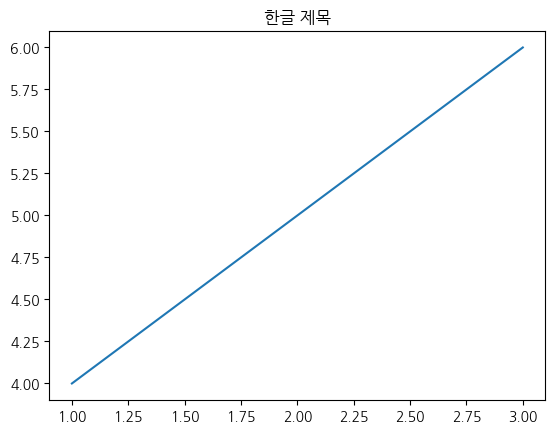

In [3]:
plt.title('한글 제목')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_path = "/content/drive/MyDrive/climateIdea/"

In [7]:
LCA_data = pd.read_csv(data_path+'한국환경산업기술원_환경성적표지 유효 인증현황_20240719.csv', encoding='euc-kr')
kind_of_water_data = pd.read_csv(data_path + "kind_of_water_dataset.csv")
water_data = pd.read_csv(data_path + "water_dataset.csv")

In [8]:
# 크롤링으로 물 데이터 목록을 가져옴
crawled_list = ['탐사수 무라벨, 2L, 12개', '탐사수 무라벨, 500ml, 40개', '제주삼다수 그린 무라벨, 2L, 12개',
                    '제주 삼다수, 2L, 12개', '스파클 생수 무라벨, 2L, 24개', '탐사수 무라벨, 2L, 36개',
                    '탐사수 무라벨, 2L, 24개', '탐사 샘물, 2L, 12개', '탐사수 무라벨, 500ml, 60개',
                    '한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x 20개, 20개', '스파클 생수 무라벨, 500ml, 60개', '풀무원샘물바이네이쳐 무라벨 생수, 2L, 12개']

In [9]:
water_name_list = ['탐사수','탐사수', '제주 삼다수', '제주 삼다수', '스파클 먹는샘물', '탐사수', '탐사수', '탐사 샘물', '탐사수', '몽베스트', '스파클 먹는샘물', '풀무원샘물']

In [10]:
kind_of_water_list = ['탐사수', '삼다수', '스파클', '몽베스트', '풀무원샘물']

In [11]:
print(len(crawled_list))
print(len(water_name_list))

12
12


In [12]:
crawled_data = pd.DataFrame({'원본 이름' : crawled_list, '제품명' : water_name_list})

In [13]:
crawled_data.head()

,원본 이름,제품명
0,"탐사수 무라벨, 2L, 12개",탐사수
1,"탐사수 무라벨, 500ml, 40개",탐사수
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수
3,"제주 삼다수, 2L, 12개",제주 삼다수
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물


In [14]:
# kind_of_water_data.concat({'인증제품명': ['탐사수'], '자원발자국-총량(kgSbe/L)': [kind_of_water_data['자원발자국-총량(kgSbe/L)'].mean()],
#                            '탄소발자국-총량(m3H2Oe/L)': [kind_of_water_data['탄소발자국-총량(m3H2Oe/L)'].mean()],
#                            '물발자국-총량(m3H2Oe/L)': [kind_of_water_data['물발자국-총량(m3H2Oe/L)'].mean()]})

In [15]:
kind_of_water_data.head(20)

,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L)
0,EVERYDAY 산수,0.007394,0.248485,0.005000
1,i'm eco 산수,0.140045,0.161674,0.061087
2,강원 평창수,0.003897,0.139400,0.003067
3,몽베스트,0.005027,0.155562,0.003428
4,미네랄 워터,0.005117,0.199122,0.002907
5,산수,0.000098,0.017460,0.001169
6,석수,0.003929,0.183821,0.021227
7,스파클 먹는샘물,0.003150,0.118605,0.002927
8,아이시스8.0,0.003753,0.116650,0.004525
9,아이시스8.0ECO,0.003720,0.103333,0.003800


In [16]:
# kind_of_water_data의 인증제품명이 crawled_data의 제품명에 포함되는지 확인하기 위한 열 생성
kind_of_water_data['merge_key'] = kind_of_water_data['인증제품명'].apply(
    lambda x: next((prod for prod in crawled_data['제품명'] if prod in x), None)
)

# merge_key를 기준으로 left join
merged_df = pd.merge(crawled_data,kind_of_water_data, left_on='제품명', right_on='merge_key' , how='left')


In [17]:
merged_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key
0,"탐사수 무라벨, 2L, 12개",탐사수,NaN,NaN,NaN,NaN,NaN
1,"탐사수 무라벨, 500ml, 40개",탐사수,NaN,NaN,NaN,NaN,NaN
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
3,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물
5,"탐사수 무라벨, 2L, 36개",탐사수,NaN,NaN,NaN,NaN,NaN
6,"탐사수 무라벨, 2L, 24개",탐사수,NaN,NaN,NaN,NaN,NaN
7,"탐사 샘물, 2L, 12개",탐사 샘물,NaN,NaN,NaN,NaN,NaN
8,"탐사수 무라벨, 500ml, 60개",탐사수,NaN,NaN,NaN,NaN,NaN
9,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트


In [18]:
# NaN인 행들에 대해 처리
merged_df['인증제품명'] = merged_df.apply(
    lambda row: row['제품명'] if pd.isna(row['인증제품명']) else row['인증제품명'], axis=1)

merged_df['merge_key'] = merged_df.apply(
    lambda row: row['제품명'] if pd.isna(row['merge_key']) else row['merge_key'], axis=1)
merged_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key
0,"탐사수 무라벨, 2L, 12개",탐사수,탐사수,NaN,NaN,NaN,탐사수
1,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수,NaN,NaN,NaN,탐사수
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
3,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물
5,"탐사수 무라벨, 2L, 36개",탐사수,탐사수,NaN,NaN,NaN,탐사수
6,"탐사수 무라벨, 2L, 24개",탐사수,탐사수,NaN,NaN,NaN,탐사수
7,"탐사 샘물, 2L, 12개",탐사 샘물,탐사 샘물,NaN,NaN,NaN,탐사 샘물
8,"탐사수 무라벨, 500ml, 60개",탐사수,탐사수,NaN,NaN,NaN,탐사수
9,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트


In [19]:
# 각 컬럼의 평균값 계산
mean_resource = kind_of_water_data['자원발자국-총량(kgSbe/L)'].mean()
mean_carbon = kind_of_water_data['탄소발자국-총량(m3H2Oe/L)'].mean()
mean_water = kind_of_water_data['물발자국-총량(m3H2Oe/L)'].mean()

In [20]:
# 발자국 nan 처리
merged_df['자원발자국-총량(kgSbe/L)'] = merged_df['자원발자국-총량(kgSbe/L)'].fillna(mean_resource)
merged_df['탄소발자국-총량(m3H2Oe/L)'] = merged_df['탄소발자국-총량(m3H2Oe/L)'].fillna(mean_carbon)
merged_df['물발자국-총량(m3H2Oe/L)'] = merged_df['물발자국-총량(m3H2Oe/L)'].fillna(mean_water)

merged_df.head()

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key
0,"탐사수 무라벨, 2L, 12개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수
1,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
3,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물


In [21]:
# 순위 계산
merged_df['자원발자국 순위'] = merged_df['자원발자국-총량(kgSbe/L)'].rank(ascending=True, pct=False, method='min')
merged_df['탄소발자국 순위'] = merged_df['탄소발자국-총량(m3H2Oe/L)'].rank(ascending=True, pct=False, method='min')
merged_df['물발자국 순위'] = merged_df['물발자국-총량(m3H2Oe/L)'].rank(ascending=True, pct=False, method='min')

merged_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key,자원발자국 순위,탄소발자국 순위,물발자국 순위
0,"탐사수 무라벨, 2L, 12개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7.0,4.0,7.0
1,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7.0,4.0,7.0
2,"제주삼다수 그린 무라벨, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수,5.0,11.0,5.0
3,"제주 삼다수, 2L, 12개",제주 삼다수,제주 삼다수,0.006677,0.220159,0.003576,제주 삼다수,5.0,11.0,5.0
4,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물,1.0,2.0,2.0
5,"탐사수 무라벨, 2L, 36개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7.0,4.0,7.0
6,"탐사수 무라벨, 2L, 24개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7.0,4.0,7.0
7,"탐사 샘물, 2L, 12개",탐사 샘물,탐사 샘물,0.012877,0.152094,0.008237,탐사 샘물,7.0,4.0,7.0
8,"탐사수 무라벨, 500ml, 60개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7.0,4.0,7.0
9,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트,4.0,10.0,4.0


In [22]:
# 순위 컬럼들을 int로 변환
merged_df['자원발자국 순위'] = merged_df['자원발자국 순위'].astype(int)
merged_df['탄소발자국 순위'] = merged_df['탄소발자국 순위'].astype(int)
merged_df['물발자국 순위'] = merged_df['물발자국 순위'].astype(int)

# '총순위' 컬럼 추가 (자원발자국 순위 + 탄소발자국 순위 + 물발자국 순위)
merged_df['순위 합'] = merged_df['자원발자국 순위'] + merged_df['탄소발자국 순위'] + merged_df['물발자국 순위']

# '총순위' 기준으로 오름차순 정렬
final_df = merged_df.sort_values(by='순위 합')

In [23]:
# 최대 순위 계산
max_resource =final_df['자원발자국 순위'].max()
max_carbon = final_df['탄소발자국 순위'].max()
max_water = final_df['물발자국 순위'].max()

max_rank = max(max_resource, max_carbon, max_water)

In [24]:
print(max_rank)

11


In [25]:
final_df.reset_index(drop=True, inplace=True)

In [26]:
final_df

,원본 이름,제품명,인증제품명,자원발자국-총량(kgSbe/L),탄소발자국-총량(m3H2Oe/L),물발자국-총량(m3H2Oe/L),merge_key,자원발자국 순위,탄소발자국 순위,물발자국 순위,순위 합
0,"스파클 생수 무라벨, 2L, 24개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물,1,2,2,5
1,"스파클 생수 무라벨, 500ml, 60개",스파클 먹는샘물,스파클 먹는샘물,0.003150,0.118605,0.002927,스파클 먹는샘물,1,2,2,5
2,"풀무원샘물바이네이쳐 무라벨 생수, 2L, 12개",풀무원샘물,풀무원샘물,0.003380,0.117000,0.002893,풀무원샘물,3,1,1,5
3,"탐사수 무라벨, 2L, 12개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7,4,7,18
4,"탐사수 무라벨, 500ml, 40개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7,4,7,18
5,"탐사수 무라벨, 2L, 36개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7,4,7,18
6,"탐사수 무라벨, 2L, 24개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7,4,7,18
7,"탐사 샘물, 2L, 12개",탐사 샘물,탐사 샘물,0.012877,0.152094,0.008237,탐사 샘물,7,4,7,18
8,"탐사수 무라벨, 500ml, 60개",탐사수,탐사수,0.012877,0.152094,0.008237,탐사수,7,4,7,18
9,"한국청정음로(주) 몽베스트 생수 물 330ml 500ml 1L 2L, 300ml x...",몽베스트,몽베스트,0.005027,0.155562,0.003428,몽베스트,4,10,4,18


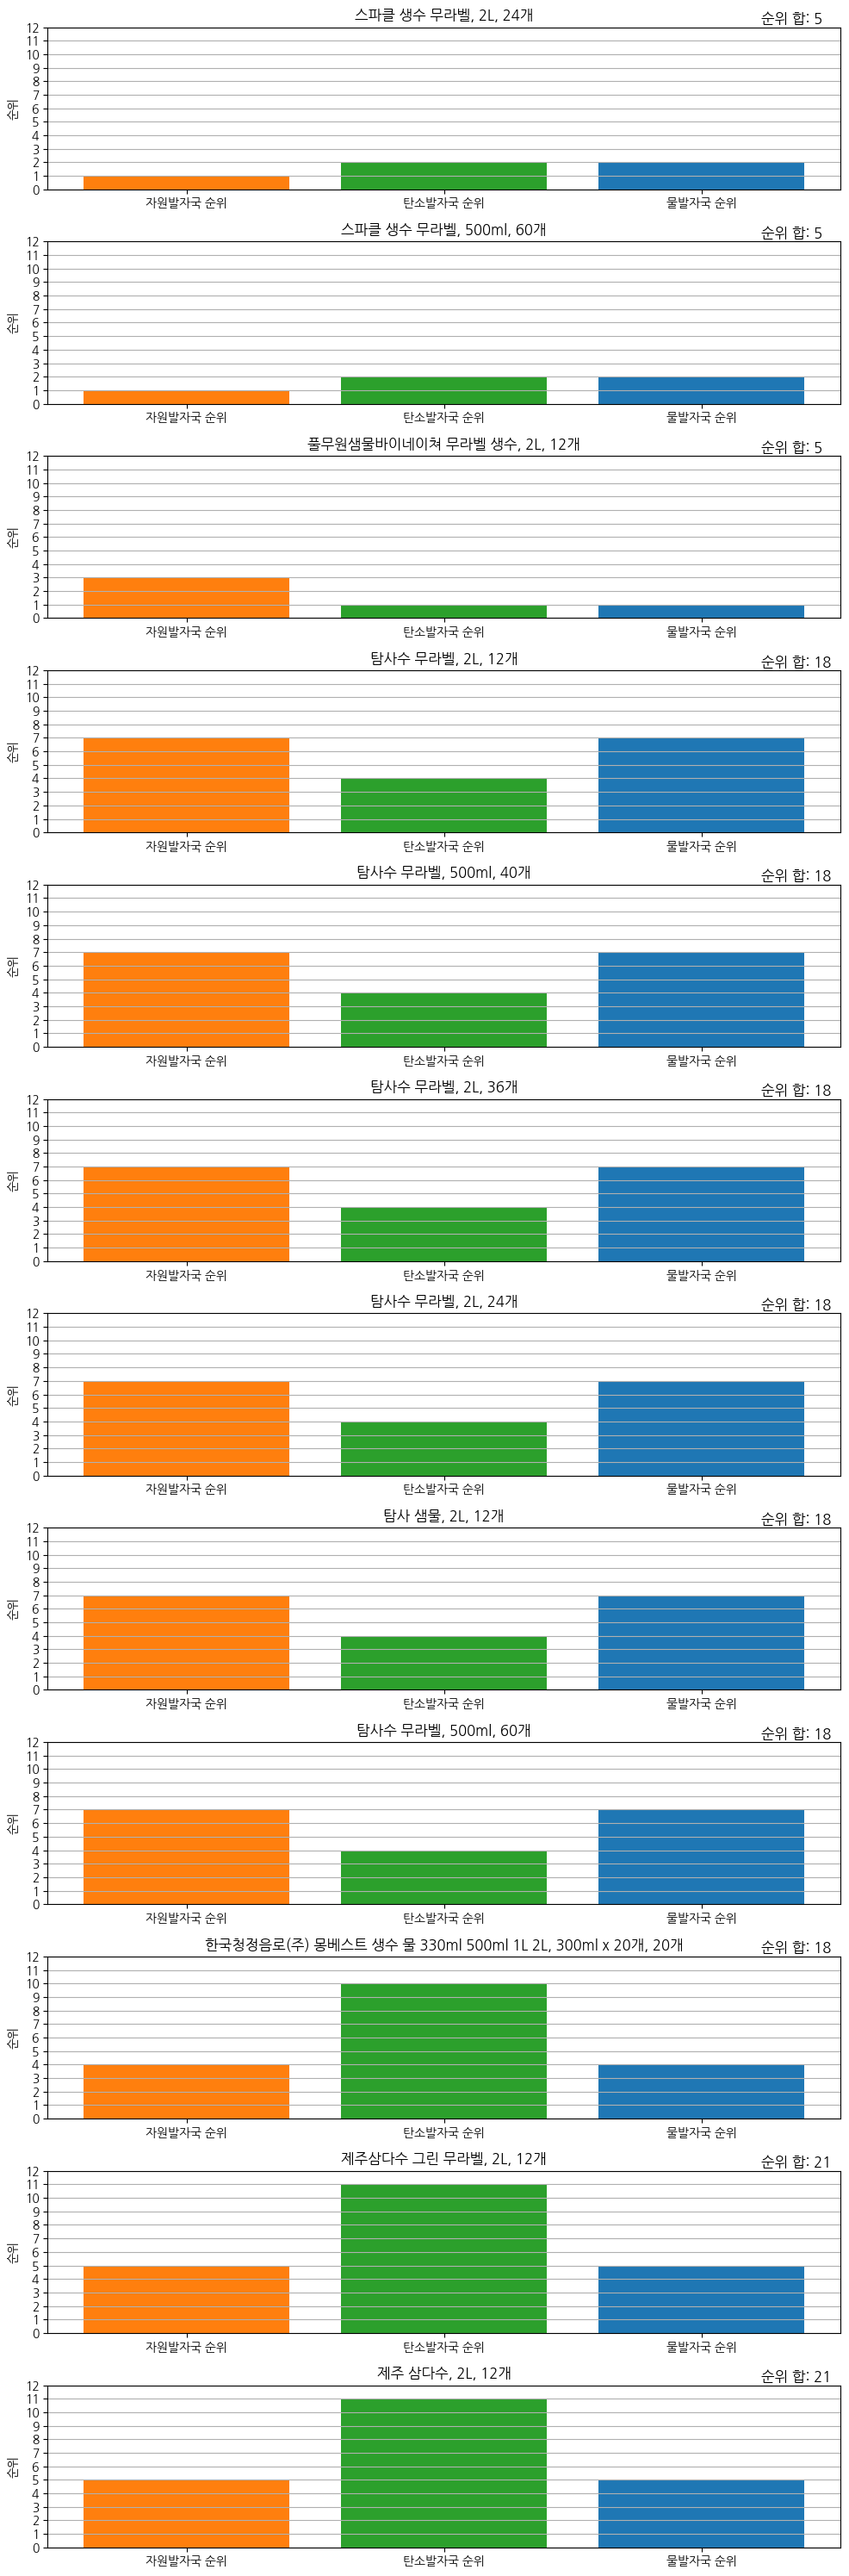

In [27]:
colors = ['tab:orange', 'tab:green', 'tab:blue']  # 자원발자국, 물발자국, 탄소발자국에 대한 색상
# subplot을 그리기 위한 설정
fig, axs = plt.subplots(len(final_df), 1, figsize=(10, 30))

# 각 행별로 subplot 생성
for i, row in final_df.iterrows():
    ax = axs[i] if len(final_df) > 1 else axs
    ax.bar(['자원발자국 순위', '탄소발자국 순위', '물발자국 순위'],
           [row['자원발자국 순위'], row['탄소발자국 순위'], row['물발자국 순위']],
           color=colors)


    # ax.set_title(row['원본 이름']

    ax.set_title(row['원본 이름'], loc='center')  # 제목을 좌측에 설정
    ax.text(0.9, 1.05, f"순위 합: {row['순위 합']}", transform=ax.transAxes, fontsize=12,
            color='black', ha='left', va='center')

    ax.set_ylabel('순위')
    ax.set_ylim(0, int(max_rank)+1)
    ax.set_yticks(range(0, int(max_rank)+2, 1))  # y축 간격을 1로 설정
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

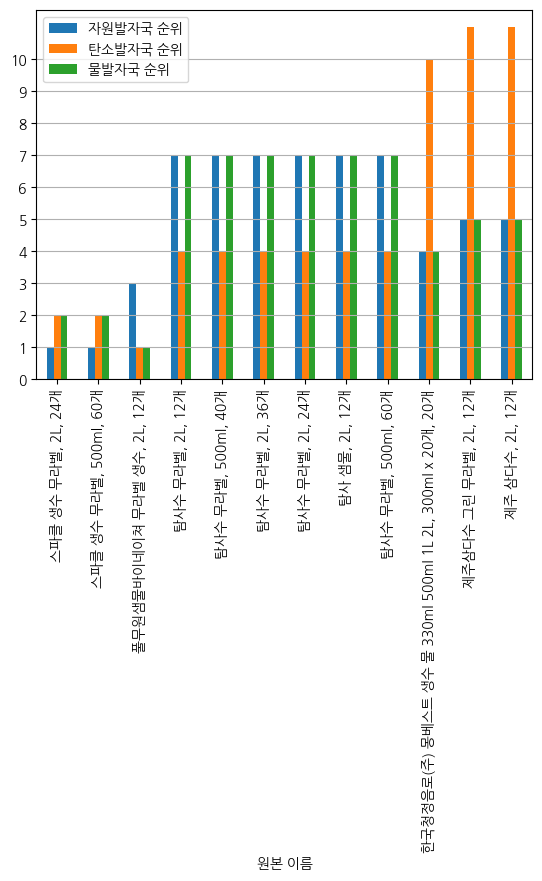

In [28]:
final_df.plot.bar(x='원본 이름',y=['자원발자국 순위','탄소발자국 순위','물발자국 순위'])
plt.yticks(np.arange(0,max_rank,1))
plt.grid(True, axis='y')
plt.show()